In [14]:
import pandas as pd

In [19]:
import numpy as np

In [20]:
df=pd.read_csv('studentPerformace.csv')

In [21]:
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father         15.0                16                  2   
1        F   Father         20.0                20                  3   
2        F   Father         10.0                 7                  0   
3        F   Father         30.0                25                  5   
4        F   Father         40.0                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    480 non-null    object 
 1   NationalITy               480 non-null    object 
 2   PlaceofBirth              480 non-null    object 
 3   StageID                   480 non-null    object 
 4   GradeID                   480 non-null    object 
 5   SectionID                 480 non-null    object 
 6   Topic                     480 non-null    object 
 7   Semester                  480 non-null    object 
 8   Relation                  480 non-null    object 
 9   raisedhands               469 non-null    float64
 10  VisITedResources          480 non-null    int64  
 11  AnnouncementsView         480 non-null    int64  
 12  Discussion                480 non-null    int64  
 13  ParentAnsweringSurvey     480 non-null    object 
 14  Parentscho

In [23]:
df.isnull().sum()

gender                       0
NationalITy                  0
PlaceofBirth                 0
StageID                      0
GradeID                      0
SectionID                    0
Topic                        0
Semester                     0
Relation                     0
raisedhands                 11
VisITedResources             0
AnnouncementsView            0
Discussion                   0
ParentAnsweringSurvey        0
ParentschoolSatisfaction     0
StudentAbsenceDays           0
Class                        0
dtype: int64

In [25]:
new_df=df['raisedhands'].replace(np.nan,0)

In [26]:
new_df.isnull().sum()

0

In [28]:
df.dropna(axis=0,inplace=True)


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 469 entries, 0 to 478
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    469 non-null    object 
 1   NationalITy               469 non-null    object 
 2   PlaceofBirth              469 non-null    object 
 3   StageID                   469 non-null    object 
 4   GradeID                   469 non-null    object 
 5   SectionID                 469 non-null    object 
 6   Topic                     469 non-null    object 
 7   Semester                  469 non-null    object 
 8   Relation                  469 non-null    object 
 9   raisedhands               469 non-null    float64
 10  VisITedResources          469 non-null    int64  
 11  AnnouncementsView         469 non-null    int64  
 12  Discussion                469 non-null    int64  
 13  ParentAnsweringSurvey     469 non-null    object 
 14  Parentscho

In [31]:
import seaborn as sb
import warnings 
import matplotlib.pyplot as plt

before Shape (469, 17)
After shape (416, 17)


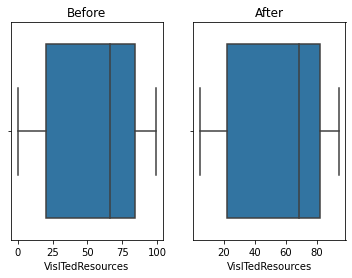

In [35]:
warnings.filterwarnings("ignore")
fig,axis=plt.subplots(1,2)
max_val=df.VisITedResources.quantile(0.95)
min_val=df.VisITedResources.quantile(0.05)
print("before Shape",df.shape)
df2=df[(df['VisITedResources']>min_val)&(df['VisITedResources']<max_val)]
print("After shape",df2.shape)

sb.boxplot(df['VisITedResources'],orient='v',ax=axis[0])
axis[0].title.set_text("Before")
sb.boxplot(df2['VisITedResources'],orient='v',ax=axis[1])
axis[1].title.set_text("After")
plt.show()

In [36]:
df.head()

gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father         15.0                16                  2   
1        F   Father         20.0                20                  3   
2        F   Father         10.0                 7                  0   
3        F   Father         30.0                25                  5   
4        F   Father         40.0                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                     Good   
1          25                   Yes                     Good   
2          30                    No                      Bad   
3          35                    No                      Bad   
4          50                    No                      Bad   

  StudentAbsenceDays Class  
0            Under-7     M  
1            Under-7     M  
2            Above-7     L  
3            Above-7     L  
4            Above-7     M

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler=StandardScaler()
x=df[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]
scaledf=scaler.fit_transform(x)
print(scaledf)

[[-1.0278357  -1.18728725 -1.35362968 -0.8298134 ]
 [-0.86616994 -1.06612362 -1.31617306 -0.64788442]
 [-1.18950145 -1.4599054  -1.42854293 -0.46595543]
 ...
 [ 0.10382457  0.660458   -0.90415019 -0.53872703]
 [ 0.26549033  0.56958528 -0.49212733 -0.50234123]
 [-0.54283844 -1.15699634 -0.90415019  0.51646109]]


In [39]:
df.Discussion.hist()

<AxesSubplot:>

In [40]:
import scipy.stats as stats

In [43]:
sb.distplot(df['Discussion'],bins=40)

<AxesSubplot:xlabel='Discussion', ylabel='Density'>

In [44]:
df['Discussion'].skew()

0.3843136967974286

In [46]:
log=np.log(df['Discussion'])
print(log.skew())

-1.0676799077159471


<AxesSubplot:xlabel='Discussion', ylabel='Density'>

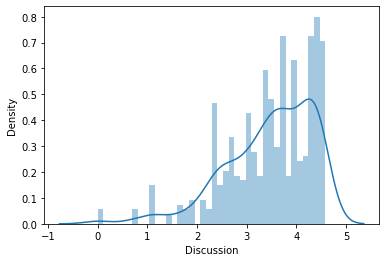

In [47]:
sb.distplot(log,bins=40)